# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Âu Dương Khang
- MSSV: 21127621
- Lớp: 21CLC1

# Import

In [1]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây    

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [4]:
# Phần code cho yêu cầu 1a
X_train_a = X_train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y_train_a = train[['Performance Index']]
theta = LinearRegression().fit(X_train_a,y_train_a)
theta.coef_.round(3)


array([[2.852, 1.018, 0.604, 0.474, 0.192]])

In [5]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
X_test_a = X_test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y_test_a = test[['Performance Index']]
y_new = theta.predict(X_test_a)
mean_absolute_error(y_test_a,y_new)

1.5956486884762973

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23183.33(Gender) + 702.767(10percentage) + 1259.019(12percentage) -99570.608(CollegeTier) + 18369.962(Degree)$$ 
$$+ 1297.532(collegeGPA) -8836.727(CollegeCityTier) + 141.76(English) + 145.742(Logical) + 114.643(Quant) + 34955.75(Domain) $$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [6]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
CVData = []
kfolds = 5 
clf = LinearRegression()
y_train_b = train[['Performance Index']]

X_train_b = X_train[['Hours Studied']]
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)

scores = cross_val_score(clf, X_train_b, y_train_b, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_b = X_train[['Previous Scores']]
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)

scores = cross_val_score(clf, X_train_b, y_train_b, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_b = X_train[['Extracurricular Activities']]
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)

scores = cross_val_score(clf, X_train_b, y_train_b, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_b = X_train[['Sleep Hours']]
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)

scores = cross_val_score(clf, X_train_b, y_train_b, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_b = X_train[['Sample Question Papers Practiced']]
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)

scores = cross_val_score(clf, X_train_b, y_train_b, cv = k_folds,scoring='neg_mean_absolute_error')

CVData.append(-scores.mean())


X_train_b = X_train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
CVData = np.asarray([X_train_b.columns,CVData])

CVdf = pd.DataFrame(CVData.T, columns=["Mô hình với 1 đặc trưng", "MAE"])

SortedFeatures = CVdf.sort_values(by=['MAE'], ignore_index=True)

# In ra các kết quả cross-validation như yêu cầu
print("Best Feature: ", SortedFeatures.iloc[0, 0])
print("MAE Value: ", SortedFeatures.iloc[0, 1])
display(SortedFeatures)



Best Feature:  Previous Scores
MAE Value:  6.61821482613572


,Mô hình với 1 đặc trưng,MAE
0,Previous Scores,6.618215
1,Hours Studied,15.448599
2,Sleep Hours,16.187007
3,Sample Question Papers Practiced,16.188386
4,Extracurricular Activities,16.195873


In [7]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_train_b = X_train[SortedFeatures.iloc[[0], 0]]
theta = LinearRegression().fit(X_best_train_b,y_train_b)
theta.coef_.round(3)


array([[1.011]])

In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test_b = X_test[SortedFeatures.iloc[[0], 0]]
y_test_b = test[['Performance Index']]
y_new = theta.predict(X_test_b)
mean_absolute_error(y_test_b,y_new)


6.544277293452501

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -16021.494 (nueroticism)$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [9]:
# # Phần code cho yêu cầu 1c
# # Tìm ra đặc trưng tốt nhất
# # In ra các kết quả cross-validation như yêu cầu

# CVData = []
# y_train_c = train[['Salary']]


# X_train_c = X_train[['English']]
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_c, y_train_c, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

# X_train_c = X_train[['Logical']]
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_c, y_train_c, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

# X_train_c = X_train[['Quant']]
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_c, y_train_c, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

# X_train_c = X_train[['English','Logical','Quant']]
# CVData = np.asarray([X_train_c.columns,CVData])
# CVdf = pd.DataFrame(CVData.T, columns=["Mô hình với 1 đặc trưng", "MAE"])
# SortedFeatures = CVdf.sort_values(by=['MAE'], ignore_index=True)

# # In ra các kết quả cross-validation như yêu cầu
# print("Best Feature: ", SortedFeatures.iloc[0, 0])
# print("MAE Value: ", SortedFeatures.iloc[0, 1])
# display(SortedFeatures)

In [10]:
# # Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# X_best_train_c = X_train[[SortedFeatures.iloc[0, 0]]]
# theta = LinearRegression().fit(X_best_train_c,y_train_c)
# theta.coef_.round(3)

In [11]:
# # Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
# X_test_c = X_test[SortedFeatures.iloc[[0], 0]]
# y_test_c = test[['Salary']]
# y_new = theta.predict(X_test_c)
# mean_absolute_error(y_test_c,y_new)

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 368.852(Quant)$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [12]:
# Trình bày các phần tìm ra mô hình
#Tìm độ tương quan giữa các thuộc tính
correlations = X_train.corr()
correlations = correlations.iloc[:, -1]
correlations = correlations.sort_values(ascending=False)
print(correlations)

Sample Question Papers Practiced    1.000000
Hours Studied                       0.015852
Extracurricular Activities          0.008199
Previous Scores                     0.006417
Sleep Hours                         0.005054
Name: Sample Question Papers Practiced, dtype: float64


<Axes: >

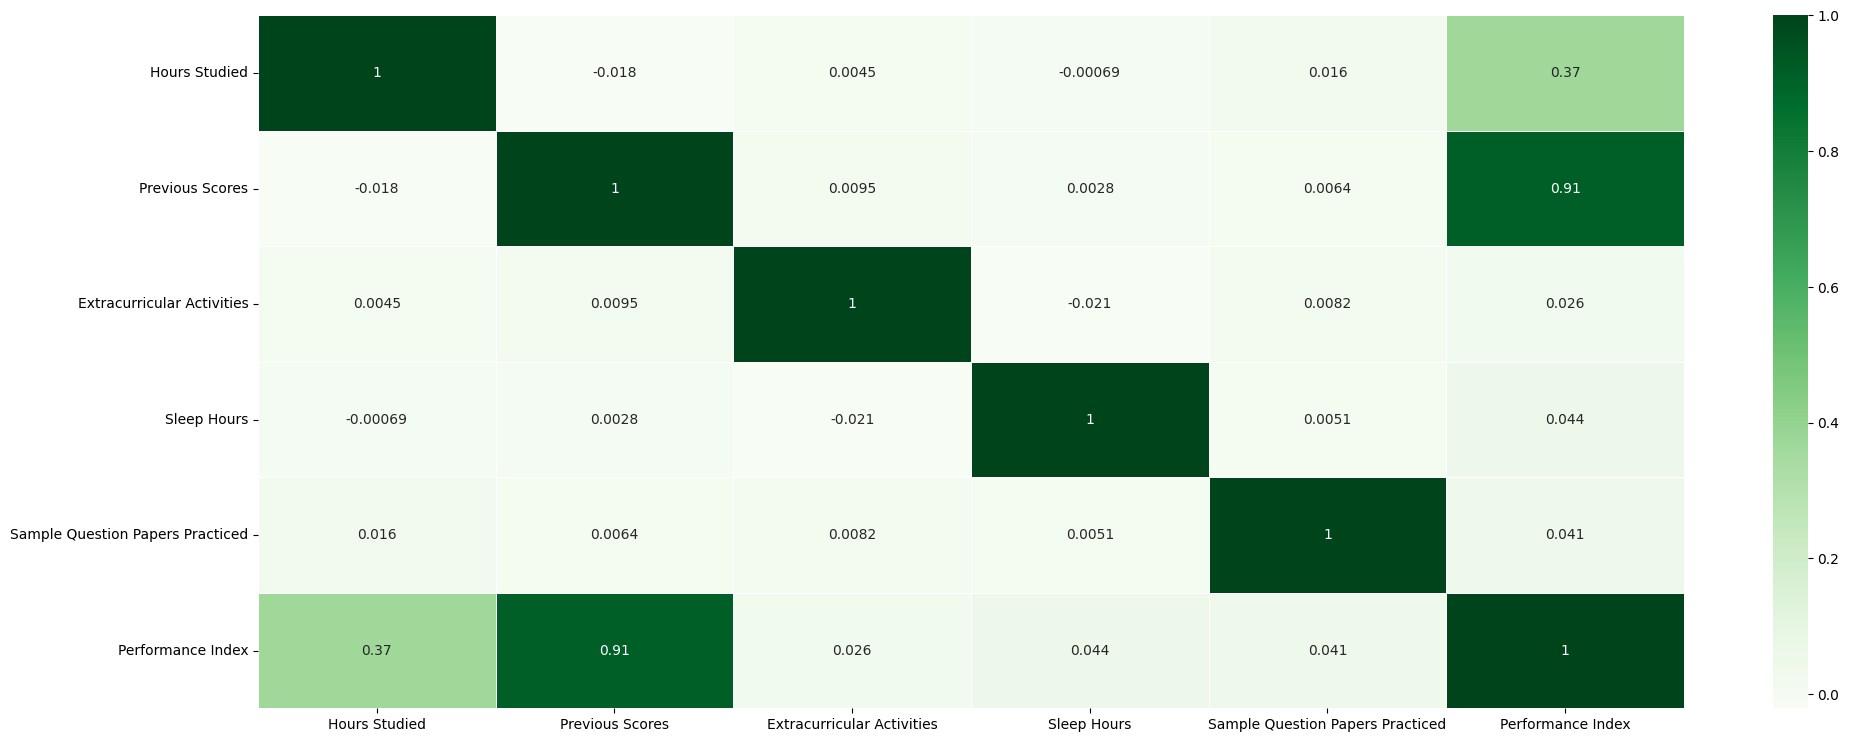

In [13]:
#tìm độ tương quan giữa các thuộc tính với thuộc tính Salary
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(23, 9))
sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=.5, ax = ax)

In [14]:
#Model 1: Select feature with correlation positive
p1 = X_train[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
#Model 2:  Select feature with correlation positive and < 0.1
p2 = X_train[['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
#Model 3:  Select feature with correlation > 0.1
p3 = X_train[['Hours Studied','Previous Scores' ]]
#Model 4: Select feature with correlation > 0.15
# p4 = X_train[['10percentage','English','Logical','Quant']]
#Model 5: Select feature with correlation > 0.1 and select first 6 features
# p5 = X_train[['10percentage','12percentage','collegeGPA', 'English','Logical','Quant']]

## Thử nghiệm, so sánh các mô hình

In [15]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
y_train_d = train[['Performance Index']]
models = []
CVData = []

X_train_d = p1
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_d = p2
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

X_train_d = p3
k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
CVData.append(-scores.mean())

# X_train_d = p4
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

# X_train_d = p5
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

# X_train_d = p5
# X_train_d = np.asarray(p5)
# X_train_d = np.sqrt(p5)
# k_folds = KFold(n_splits = kfolds, shuffle=True,random_state=42)
# scores = cross_val_score(clf, X_train_d, y_train_d, cv = k_folds,scoring='neg_mean_absolute_error')
# CVData.append(-scores.mean())

ModelNames = pd.Series([
    "Model 1",
    "Model 2",
    "Model 3",

])

CVData = np.asarray([ModelNames,CVData])
CVdf = pd.DataFrame(CVData.T, columns=["Feature", "MAE"])
SortedFeatures = CVdf.sort_values(by=['MAE'], ignore_index=True)

# In ra các kết quả cross-validation như yêu cầu
print("Best Feature: ", SortedFeatures.iloc[0, 0])
print("MAE Value: ", SortedFeatures.iloc[0, 1])
display(SortedFeatures)

Best Feature:  Model 1
MAE Value:  1.6215414357086442


,Feature,MAE
0,Model 1,1.621541
1,Model 3,1.816178
2,Model 2,16.180217


In [16]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_best_train_d = p3
theta = LinearRegression().fit(X_best_train_d,y_train_d)
theta.coef_.round(3)

array([[2.856, 1.018]])

In [17]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
X_test_d = X_test[['Hours Studied','Previous Scores']]
y_test_d = test[['Performance Index']]
y_new = theta.predict(X_test_d)
mean_absolute_error(y_test_d,y_new)

1.839436397652968

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 671.584(10percentage) + 985.312(12percentage) + 1193.068(collegeGPA) + 155.09(English) + 144.618(Logical) + 167.789(Quant)$$
$$ +24416.461(Domain) +  70.416 (ComputerProgramming)$$